# Compare Cell Types

In [1]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
from scipy.sparse import issparse
print(ad.__version__)

0.11.4


In [2]:
# There are 9 excel files in the folder results
# The excel files have two collumns: 'Gene' and 'Number of Significant Differences'

# The excel files are named: "results/{}_significant_differences.xlsx".format(cell_type)
cell_types = [
    "CD8-positive, alpha-beta T cell",
    "CD8-positive, alpha-beta memory T cell",
    "CD4-positive, alpha-beta T cell",
    "central memory CD4-positive, alpha-beta T cell",
    "effector memory CD4-positive, alpha-beta T cell",
    "gamma-delta T cell",
    "regulatory T cell",
    "double negative T regulatory cell",
    "innate lymphoid cell"
]

# Load all the excel files into separate dictionaries
excel_files = {}

for cell_type in cell_types:
    file_path = f"results/network/young_old//{cell_type}_significant_differences.xlsx"
    excel_files[cell_type] = pd.read_excel(file_path)
    

In [3]:
# Print the top 10 rows of each dataframe
for cell_type, df in excel_files.items():
    print(f"Top 10 rows for {cell_type}:")
    print(df.head(10))
    print("\n")



Top 10 rows for CD8-positive, alpha-beta T cell:
              Gene  Number of Significant Differences
0  ENSG00000101608                                138
1  ENSG00000159388                                125
2  ENSG00000010404                                125
3  ENSG00000124614                                114
4  ENSG00000128340                                108
5  ENSG00000109971                                107
6  ENSG00000136490                                106
7  ENSG00000157514                                106
8  ENSG00000173812                                105
9  ENSG00000139193                                102


Top 10 rows for CD8-positive, alpha-beta memory T cell:
              Gene  Number of Significant Differences
0  ENSG00000122026                                297
1  ENSG00000177954                                288
2  ENSG00000124942                                279
3  ENSG00000145592                                273
4  ENSG00000137076           

In [4]:
# Load all the excel files of the same cell type
# The excel files have 6 columns: 'Gene1' and 'Gene2', 'Correlation Difference', 'Correlation Young', 'Correlation Middle', 'Correlation Old'

excel_files_top_diff_genes = {}

for cell_type in cell_types:
    file_path = f"results/{cell_type}_top_diff_genes.xlsx"
    excel_files_top_diff_genes[cell_type] = pd.read_excel(file_path)


In [5]:
# Print the regular T cell file
print(excel_files_top_diff_genes["CD4-positive, alpha-beta T cell"].head(10).to_string(index=False))

          Gene1           Gene2  Correlation Difference  Correlation Young  Correlation Middle  Correlation Old
ENSG00000104660 ENSG00000197111                0.941815          -0.371038           -0.008649         0.570777
ENSG00000197111 ENSG00000104660                0.941815          -0.371038           -0.008649         0.570777
ENSG00000147604 ENSG00000197111                0.937499          -0.352208            0.111207         0.585291
ENSG00000197111 ENSG00000147604                0.937499          -0.352208            0.111207         0.585291
ENSG00000125691 ENSG00000197111                0.935570          -0.404992            0.034008         0.530578
ENSG00000197111 ENSG00000125691                0.935570          -0.404992            0.034008         0.530578
ENSG00000116824 ENSG00000099860                0.901299           0.573757            0.294734        -0.327542
ENSG00000099860 ENSG00000116824                0.901299           0.573757            0.294734        -0

In [6]:
# Create a new dictionary where we add all the significant differences for each cell type
# all_significant_differences = {} gene: number of significant differences
all_significant_differences = {}
for cell_type, df in excel_files.items():
    for index, row in df.iterrows():
        gene = row['Gene']
        number_of_differences = row['Number of Significant Differences']
        
        if gene not in all_significant_differences:
            all_significant_differences[gene] = 0
            
        all_significant_differences[gene] += number_of_differences

# Sort the dictionary by number of significant differences
sorted_significant_differences = sorted(all_significant_differences.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame
df_significant_differences = pd.DataFrame(sorted_significant_differences, columns=['Gene', 'Number of Significant Differences'])

In [7]:
# print the top 10 genes with the most significant differences
print("=== Top 10 Genes with the Most Significant Differences ===")
print(df_significant_differences.head(10).to_string(index=False))

=== Top 10 Genes with the Most Significant Differences ===
           Gene  Number of Significant Differences
ENSG00000124614                               1618
ENSG00000177954                               1605
ENSG00000145592                               1529
ENSG00000241343                               1494
ENSG00000122026                               1490
ENSG00000197111                               1480
ENSG00000146278                               1375
ENSG00000100345                               1353
ENSG00000196924                               1345
ENSG00000124942                               1337


C:\Users\Tycho\AppData\Local\Temp\ipykernel_4388\3869291238.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


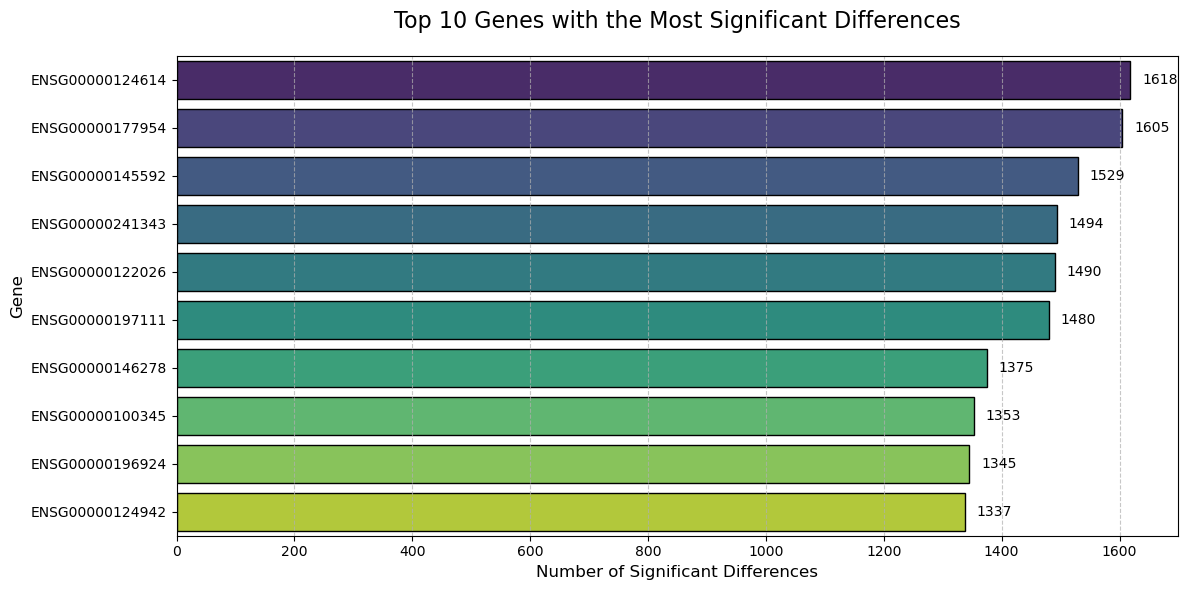

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named `df_significant_differences`
top_10 = df_significant_differences.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Number of Significant Differences', 
    y='Gene', 
    data=top_10,
    palette='viridis',  # Use any palette you like (e.g., 'magma', 'plasma')
    edgecolor='black'
)

# Customize the plot
plt.title('Top 10 Genes with the Most Significant Differences', fontsize=16, pad=20)
plt.xlabel('Number of Significant Differences', fontsize=12)
plt.ylabel('Gene', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on the bars
for i, value in enumerate(top_10['Number of Significant Differences']):
    plt.text(value + 20, i, f'{value}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [12]:
# Test if the pareto principle applies
# Calculate the cumulative sum of significant differences
total = df_significant_differences['Number of Significant Differences'].cumsum()

int_twenty = int(0.2 * len(df_significant_differences)) - 1
print(f"Total number of significant differences: {total.iloc[-1]}")
print(f"Total number of significant differences in the top 20%: {total[int_twenty]}")
print(f"Percentage of significant differences in the top 20%: {(total[int_twenty] / total.iloc[-1]) * 100:.2f}%")
print(f"Total number of genes: {len(df_significant_differences)}")

Total number of significant differences: 332886
Total number of significant differences in the top 20%: 172960
Percentage of significant differences in the top 20%: 51.96%
Total number of genes: 950


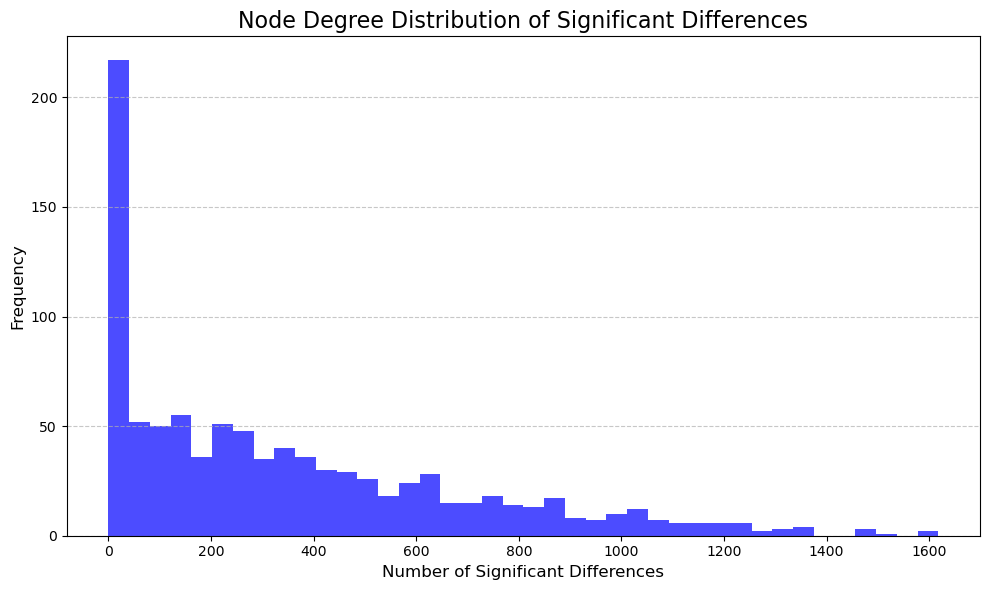

In [13]:
# Plot a node degree distribution for df_significant_differences
plt.figure(figsize=(10, 6))
plt.hist(df_significant_differences['Number of Significant Differences'], bins=40, color='blue', alpha=0.7)
plt.title('Node Degree Distribution of Significant Differences', fontsize=16)
plt.xlabel('Number of Significant Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
# Find all the distinct genes in the 9 different cell types
distinct_genes = set()
for cell_type, df in excel_files_top_diff_genes.items():
    distinct_genes.update(df['Gene1'].unique())
    distinct_genes.update(df['Gene2'].unique())

# Print the number of distinct genes
print(f"Number of distinct genes across all cell types: {len(distinct_genes)}")

Number of distinct genes across all cell types: 950


In [18]:
# Find the feature name for all the distinct genes in the anndata object

adata = ad.read_h5ad("../h5ad/0fce5dd5-bcec-4288-90b3-19a16b45ad16.h5ad", backed='r')


results = []
for target_gene in distinct_genes:
    result = adata.var['feature_name'][target_gene]
    results.append(result)
    print(result.split('_')[0])

# Do the same for the top 10 genes with the most significant differences
top_10_genes = df_significant_differences.head(10)['Gene'].tolist()
results_top_10_genes = []
for target_gene in top_10_genes:
    result = adata.var['feature_name'][target_gene]
    results_top_10_genes.append(result)
    print(result.split('_')[0])


print(results)
print(results_top_10_genes)

# Save the results to a text file
with open('results/all_genes.txt', 'w') as f:
    for gene in results:
        f.write(f"{gene.split('_')[0]}\n")

# Save the top 10 genes to a text file
with open('results/top_10_genes.txt', 'w') as f:
    for gene in results_top_10_genes:
        f.write(f"{gene.split('_')[0]}\n")


ATP5F1A
EIF3M
RPS8
PCBP1
SSR2
RPL24
S1PR1
RPS19
RNF19A
JUN
CD74
RPL27
MBP
IGHV3-30
MALAT1
PAXX
RPS10
POLR2L
NOP10
RPS6
PRDX1
SAMHD1
LCP2
GNG5
UQCR11
C12orf57
PPP1CC
RPS24
RPS18
ACTB
LDHA
CHD2
MZT2B
RSL1D1
ATP5F1C
MT2A
MGAT4A
PDCD4
COX7C
FKBP8
CLDND1
TRIR
HINT1
DHRS7
SRGN
PSIP1
TRBV7-9
ANXA2
PDIA3
CCND3
DDX6
JUNB
SEPTIN1
RPL9
XRCC6
COX6B1
TLE5
COX8A
WIPF1
ACAP1
EPC1
CCR7
RBBP6
FYN
CELF2
SET
SERP1
TESPA1
STK4
LRRFIP1
MT-CO1
NDUFB9
EIF3G
COX7B
PRKCQ-AS1
CHCHD2
NDUFB4
RPL6
LBH
RPS20
GPR183
SELPLG
CD2
KMT2E
CALM1
CAST
PPM1G
CD52
RAC1
TUBB4B
ARPC3
SOCS3
ARHGAP25
HSP90AA1
MBNL1
CNBP
MIF
NDUFA12
CLEC2D
ATP5PO
NDUFA1
BCAP31
TRDV2
TRDC
PLAAT4
EIF4G2
EIF1
GBP5
P2RY8
ATP5PB
GADD45B
NDUFA11
NDUFA4
ERP29
ARPC2
ITGB7
TMEM123
UBE2D2
RPS27A
RPS7
TAF10
TAGAP
MZT2A
DDX3X
SH2D1A
KLRD1
LAPTM5
SEPTIN9
CORO7
NR4A2
TYROBP
RPL35
TOMM20
SELENOH
RPS12
RPL19
ATP6V0C
EIF3A
ARL6IP4
SNU13
HSPA8
AAK1
TMA7
ARPC4
GNB2
MT-ND2
ATP5PF
TRBV28
FMNL1
PTGDS
PEBP1
UBE2V1
PHACTR2
DUSP2
ATP6V0E1
ARGLU1
RBL2
SF3B5
APRT
EEF1B2
UTR

In [32]:
# Load all the network excel files for all cell types
cell_types = [
    "CD4-positive, alpha-beta T cell",
    "CD8-positive, alpha-beta memory T cell",
    "CD8-positive, alpha-beta T cell",
    "central memory CD4-positive, alpha-beta T cell",
    "double negative T regulatory cell",
    "effector memory CD4-positive, alpha-beta T cell",
    "gamma-delta T cell",
    # "innate lymphoid cell",
    # "regulatory T cell"
]

distinct_genes = set()

network_data = {}
for cell_type in cell_types:
    path = "results/network/young_old/{}_gene_associations.xlsx".format(cell_type)
    try:
        df = pd.read_excel(path)
        network_data[cell_type] = df
        for gene in df['Gene'].unique():
            distinct_genes.add(gene)
    except FileNotFoundError:
        print(f"File not found for cell type: {cell_type}")

In [ ]:
# Loop over all the genes in distinct_genes and retrieve the list of associations for each gene
def get_gene_associations(gene, network_data):
    associations = {}
    for cell_type, df in network_data.items():
        if gene in df['Gene'].values:
            # Check if association is empty
            if len(associations) == 0:
                string = df[df['Gene'] == gene]['Associated Genes'].values[0]
                string = string[1:-1]
                string = string.replace("'", "")

                if string == "" or len(string) == 0:
                    # print(f"No associations found for {gene} in {cell_type}")
                    return set()
                
                # print(f"Associations for {gene} in {cell_type}: {string}, {len(string)}")
                associations = set(string.split(', '))
                # print(f"Initial associations for {gene}: {associations}")
            else:
                # Intersect the associations with the new associations
                string = df[df['Gene'] == gene]['Associated Genes'].values[0]
                string = string[1:-1]
                string = string.replace("'", "")

                if string == "" or len(string) == 0:
                    # print(f"No associations found for {gene} in {cell_type}")
                    return set()
                
                new_associations = set(string.split(', '))
                temp = associations.copy()
                associations = temp.intersection(new_associations)
                
                if len(associations) == 0:
                    return set()
        else:
            return set()

    return associations



In [35]:
associations_across_cell_types = {}
for gene in distinct_genes:
    var = get_gene_associations(gene, network_data)
    
    if var and len(var) > 0:
        associations_across_cell_types[gene] = var


In [36]:
# Print the genes of the first gene
print(f"Number of genes with associations across cell types: {len(associations_across_cell_types)}")

# Convert the dictionary into a DataFrame
df = pd.DataFrame({
    "Gene": associations_across_cell_types.keys(),
    "Associated Genes": associations_across_cell_types.values()
})

# Write to Excel
df.to_csv('results/associations_across_cell_types.csv', index=False)

print("Excel file saved successfully!")

Number of genes with associations across cell types: 19
Excel file saved successfully!
